In [21]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import folium
from folium.plugins import FastMarkerCluster

%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.


In [0]:
Bus = pd.read_csv('/content/drive/My Drive/Colab Notebooks/신도림스터디/19서울버스.csv',encoding='cp949')

In [23]:
Bus.dtypes

사용년월           int64
노선ID           int64
노선번호          object
노선명           object
표준버스정류장ID      int64
버스정류장ARS번호    object
역ID            int64
역명            object
00시승차총승객수      int64
00시하차총승객수      int64
1시승차총승객수       int64
1시하차총승객수       int64
2시승차총승객수       int64
2시하차총승객수       int64
3시승차총승객수       int64
3시하차총승객수       int64
4시승차총승객수       int64
4시하차총승객수       int64
5시승차총승객수       int64
5시하차총승객수       int64
6시승차총승객수       int64
6시하차총승객수       int64
7시승차총승객수       int64
7시하차총승객수       int64
8시승차총승객수       int64
8시하차총승객수       int64
9시승차총승객수       int64
9시하차총승객수       int64
10시승차총승객수      int64
10시하차총승객수      int64
11시승차총승객수      int64
11시하차총승객수      int64
12시승차총승객수      int64
12시하차총승객수      int64
13시승차총승객수      int64
13시하차총승객수      int64
14시승차총승객수      int64
14시하차총승객수      int64
15시승차총승객수      int64
15시하차총승객수      int64
16시승차총승객수      int64
16시하차총승객수      int64
17시승차총승객수      int64
17시하차총승객수      int64
18시승차총승객수      int64
18시하차총승객수      int64
19시승차총승객수      int64
19시하차총승객수    

버스정류장ARS번호가 object타입으로 되어 있으므로 int타입으로 변환을 시켜주자.

In [0]:
Bus.drop(Bus[Bus['버스정류장ARS번호']=='~'].index,inplace=True)

In [0]:
Bus['버스정류장ARS번호']= Bus['버스정류장ARS번호'].apply(pd.to_numeric)

동작구 표준버스정류장 ID가 20으로 시작함

In [0]:
Bus[(Bus['버스정류장ARS번호']<21000)&(Bus['버스정류장ARS번호']>=20000)].to_csv('/content/drive/My Drive/Colab Notebooks/신도림스터디/19동작구버스.csv',encoding='cp949')

In [0]:
DJ_Bus = pd.read_csv('/content/drive/My Drive/Colab Notebooks/신도림스터디/19동작구버스.csv',encoding='cp949')
DJ_Bus.drop('Unnamed: 0',axis=1,inplace=True)

In [28]:
station_num=pd.read_csv('/content/drive/My Drive/Colab Notebooks/신도림스터디/정류장좌표.csv')
station_num

,표준ID,ARS-ID,정류장명,X좌표,Y좌표,비고
0,100000001,1001,종로2가사거리,126.987750,37.569765,NaN
1,100000002,1002,창경궁.서울대학교병원,126.996566,37.579183,NaN
2,100000003,1003,명륜3가.성대입구,126.998340,37.582671,NaN
3,100000004,1004,종로2가.삼일교,126.987613,37.568579,NaN
4,100000005,1005,혜화동로터리.여운형활동터,127.001744,37.586243,NaN
...,...,...,...,...,...,...
11275,124000334,25995,우성아파트,127.139339,37.550386,NaN
11276,124000333,25996,우성아파트,127.140046,37.550643,NaN
11277,124000332,25997,조일약국,127.123596,37.533630,NaN
11278,124000331,25998,성내시장,127.125497,37.536155,NaN


In [0]:
# merge를 위한 기준 컬럼명 변환
DJ_Bus=DJ_Bus.rename({'버스정류장ARS번호':'ARS-ID'},axis='columns')

In [0]:
DJ_Bus=DJ_Bus.merge(station_num,on='ARS-ID')

In [31]:
DJ_Bus.head()

,사용년월,노선ID,노선번호,노선명,표준버스정류장ID,ARS-ID,역ID,역명,00시승차총승객수,00시하차총승객수,1시승차총승객수,1시하차총승객수,2시승차총승객수,2시하차총승객수,3시승차총승객수,3시하차총승객수,4시승차총승객수,4시하차총승객수,5시승차총승객수,5시하차총승객수,6시승차총승객수,6시하차총승객수,7시승차총승객수,7시하차총승객수,8시승차총승객수,8시하차총승객수,9시승차총승객수,9시하차총승객수,10시승차총승객수,10시하차총승객수,11시승차총승객수,11시하차총승객수,12시승차총승객수,12시하차총승객수,13시승차총승객수,13시하차총승객수,14시승차총승객수,14시하차총승객수,15시승차총승객수,15시하차총승객수,16시승차총승객수,16시하차총승객수,17시승차총승객수,17시하차총승객수,18시승차총승객수,18시하차총승객수,19시승차총승객수,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,등록일자,표준ID,정류장명,X좌표,Y좌표,비고
0,201901,11110019,150,150번(도봉산~석수역),119000014,20014,8001610,노들역,0,0,0,0,0,0,0,0,0,0,493,91,179,138,439,193,436,305,398,203,238,168,195,198,236,239,244,357,283,377,310,460,416,531,426,750,335,917,380,767,285,446,321,441,365,457,151,187,20190203,119000014,노들역,126.950962,37.512734,NaN
1,201901,11110039,360,360번(송파차고지~여의도),119000014,20014,8001610,노들역,8,56,0,0,0,0,0,0,0,0,304,1230,65,488,305,776,545,1106,172,696,114,514,121,487,128,575,149,592,116,612,147,842,117,1022,170,1145,171,1204,93,823,103,1006,161,1095,142,1298,66,687,20190203,119000014,노들역,126.950962,37.512734,NaN
2,201901,11110060,605,605번(강서공영차고지~후암동),119000014,20014,8001610,노들역,39,106,0,0,0,0,0,0,0,0,46,22,51,72,130,158,240,160,179,165,170,108,146,138,187,168,236,190,195,180,208,292,207,293,221,447,206,774,188,496,127,363,154,312,139,327,75,234,20190203,119000014,노들역,126.950962,37.512734,NaN
3,201901,11110062,640,640번(신월동~강남역),119000014,20014,8001610,노들역,35,111,0,0,0,0,0,0,0,0,4,55,97,167,152,300,210,386,113,276,133,292,131,226,157,242,189,298,190,321,193,313,176,352,158,392,171,475,128,551,130,386,141,358,121,340,66,166,20190203,119000014,노들역,126.950962,37.512734,NaN
4,201901,11110377,N15,N15번(사당역~우이동),119000014,20014,8001610,노들역,0,0,0,0,0,0,38,116,71,98,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20190203,119000014,노들역,126.950962,37.512734,NaN


## 동작구 정류소 별 버스노선도 개수

In [0]:
Nosun_count=DJ_Bus[DJ_Bus['사용년월']==201906]['역명'].value_counts().reset_index()

In [33]:
Nosun_count

,index,역명
0,노량진역,55
1,노들역,45
2,동작구청.노량진초등학교앞,31
3,노량진수산시장.CTS기독교TV,29
4,숭실대입구역,23
...,...,...
283,노들역4번출구앞,1
284,성남중고,1
285,금영빌딩,1
286,대방역.여의교앞,1


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50669 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47749 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51652 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46308 missing from current font.
  font.set_

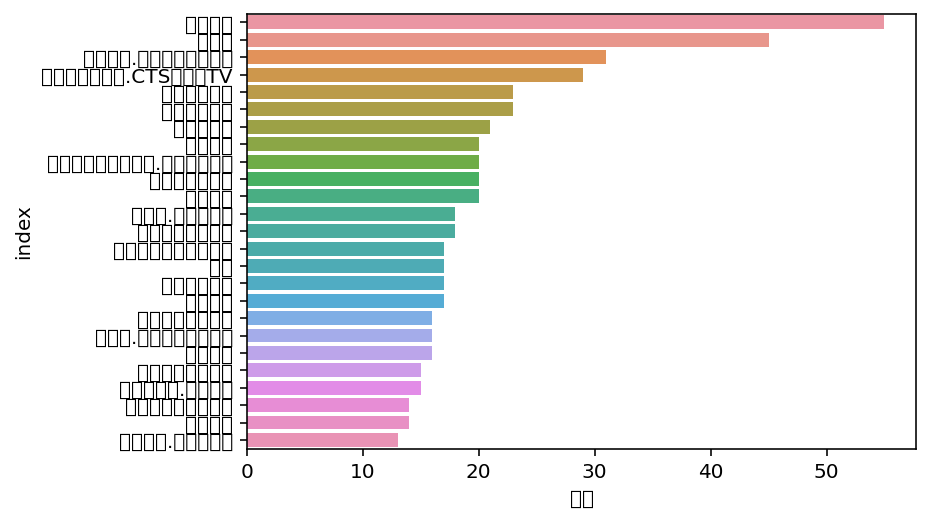

In [34]:
sns.barplot(x='역명',y='index',data=Nosun_count.head(25)) # 노선이 많은 상위 25개 정류장 

# 동작구 버스 정류장 지도 시각화

In [0]:
DJ_Station=DJ_Bus[DJ_Bus['사용년월']==201906][['역명','X좌표','Y좌표']]
DJ_Station=DJ_Station.groupby('역명')[['X좌표','Y좌표']].min().reset_index()

In [36]:
DJ_Station

,역명,X좌표,Y좌표
0,7호선신대방삼거리역2번출구.국민은행,126.928666,37.498648
1,7호선신대방삼거리역4번출구,126.926744,37.499823
2,7호선장승배기역.상도2치안센터,126.939136,37.504172
3,7호선장승배기역2번출구,126.938967,37.503932
4,7호선장승배기역5번출구,126.938975,37.505096
...,...,...,...
283,흑석동효사정앞,126.961010,37.511297
284,흑석역,126.962334,37.509106
285,흑석역.명수대현대아파트,126.964641,37.507498
286,흑석역.흑석동빗물펌프장,126.963310,37.508323


In [37]:
map= folium.Map(location=[DJ_Station['Y좌표'].mean(),DJ_Station['X좌표'].mean()],tiles='Stamen Terrain',zoom_start=14)

for i in range(0,288):
    folium.Map(location=[DJ_Station['Y좌표'].mean(),DJ_Station['X좌표'].mean()],tiles='Stamen Terrain',zoom_start=14)
    folium.RegularPolygonMarker(
        location = [DJ_Station.loc[i,'Y좌표'],DJ_Station.loc[i,'X좌표']],
        number_of_sides=5,
        color ='pink',
        radius= 6
    ).add_to(map)

map

# 동작구 관광코스 위치 프레임 생성
- 아직 추가해야할 것이 더 있을 듯.

In [38]:
tourist = pd.read_csv('/content/drive/My Drive/Colab Notebooks/신도림스터디/동작구 관광지.csv')
tourist

,place,X좌표,Y자표
0,보라매공원,126.919900,37.492500
1,노량진컵밥거리,126.945600,37.513500
2,사육신공원,126.946088,37.513844
3,삼일공원,126.974500,37.485914
4,효사정,126.960867,37.512467
5,용봉정근린공원,126.958263,37.512589
6,메트로팜,126.947923,37.503358
7,아트나인,126.981678,37.485341
8,국사봉 숲 속 작은 도서관,126.940623,37.495510
9,양녕대군이제묘역(지덕사),126.942192,37.497391


In [39]:
for i in range(0,14):
    folium.RegularPolygonMarker(
        location = [tourist.loc[i,'Y자표'],tourist.loc[i,'X좌표']],
        number_of_sides=6,
        color ='red',
        fill_color = 'PuRd',
        radius= 6
    ).add_to(map)

map

In [40]:
folium.RegularPolygonMarker

folium.features.RegularPolygonMarker

# Insight
1. 노선이 많은 관광명소(회센터나 컵밥거리?) 를 제외하고 관광지를 지정한 곳의 주변 정류장 버스 승하차 인원을 측정한 뒤, 순위를 책정하면 될 것 같음.
 - 아니면 노선개수 대비 승하차 인원을 봐도 될 것 같음. 